### Import Libraries

In [1]:
#@title

# Basic
import numpy as np
import pandas as pd

# Plotation
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
%matplotlib inline

# Miscellaneous
import time
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import mutual_info_classif
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

#### Attribute Information
1.id : Unique ID for the customer

2.Gender : Gender of the customer

3.Age : Age of the customer

4.Driving_License 0 : Customer does not have DL, 1 : Customer already has DL

5.Region_Code : Unique code for the region of the customer

6.Previously_Insured : 1 : Customer already has Vehicle Insurance, 0 : Customer doesn't have Vehicle Insurance

7.Vehicle_Age : Age of the Vehicle

8.Vehicle_Damage :1 : Customer got his/her vehicle damaged in the past. 0 : Customer didn't get his/her vehicle damaged in the past.

9.Annual_Premium : The amount customer needs to pay as premium in the year

10.PolicySalesChannel : Anonymized Code for the channel of outreaching to the customer ie. Different Agents, Over Mail, Over Phone, In Person, etc.

11.Vintage : Number of Days, Customer has been associated with the company

12.Response : 1 : Customer is interested, 0 : Customer is not interested

### Load your dataset

In [11]:
df = pd.read_csv('C:\\Users\\USER-PC\\Desktop\\ThesisCode\\Data\\Preprocessed\\aug_train_processed.csv')

In [12]:
def show_gender_response_relation(df):
    sns.catplot(x="Response", hue="Gender", kind="count",
                palette='Dark2_r',
                data=df)
    plt.xlabel('Response', fontdict={'fontsize':12})
    plt.ylabel('Count',fontdict={'fontsize': 14})
    plt.title('Response V/S Gender', fontdict={'fontsize': 15, 'fontweight':'bold'})

In [13]:
def show_distribution_numerical_features(df):
    fig, axes = plt.subplots(2,2, figsize=(20,15))

    sns.countplot(ax = axes[0][0],x = 'Age', data = df, hue='Response')
    axes[0][0].set_xlabel(xlabel = 'Age', fontdict={'fontsize': 14})
    axes[0][0].set_ylabel(ylabel = 'Count', fontdict={'fontsize': 14})
    axes[0][0].set_title('Age', fontdict={'fontsize': 15,  'fontweight' :'bold'})

    sns.countplot(ax = axes[0][1],x = 'Region_Code', data = df, hue='Response')
    axes[0][1].set_xlabel(xlabel = 'Region_Code', fontdict={'fontsize': 14})
    axes[0][1].set_ylabel(ylabel = 'Count', fontdict={'fontsize': 14})
    axes[0][1].set_title('Region_Code',fontdict={'fontsize': 15,  'fontweight' :'bold'})

    sns.countplot(ax = axes[1][0],x = 'Policy_Sales_Channel', data = df, hue='Response')
    axes[1][0].set_xlabel(xlabel = 'Policy_Sales_Channel', fontdict={'fontsize': 14})
    axes[1][0].set_ylabel(ylabel = 'Count', fontdict={'fontsize': 14})
    axes[1][0].set_title('Policy_Sales_Channel',fontdict={'fontsize': 15,  'fontweight' :'bold'})

    sns.histplot(ax = axes[1][1], x = df['Vintage'],data = df, hue='Response')
    axes[1][1].set_xlabel(xlabel = 'Vintage', fontdict={'fontsize': 14})
    axes[1][1].set_ylabel(ylabel = 'Count', fontdict={'fontsize': 14})
    axes[1][1].set_title('Vintage',fontdict={'fontsize': 15,  'fontweight' :'bold'})

    plt.suptitle('Distribution of Numerical Features', fontsize = 22, fontweight = 'bold' )

In [22]:
def show_violin_distribution(df):
    # Set up the figure for plotting
    plt.figure(figsize=(7, 6))
    
    # Violin plot for Region Code distribution by Response
    sns.violinplot(y='Region_Code', x='Response', data=df, palette='Dark2_r')
    plt.xlabel('Response', fontsize=14)
    plt.ylabel('Region Code', fontsize=14)
    plt.title('Region Code Distribution by Response', fontsize=20, fontweight='bold')
    
    plt.tight_layout()
    plt.show()

In [25]:
def show_violin_distribution1(df):
    # Set up the figure for plotting
    plt.figure(figsize=(7, 6))
    
    # Violin plot for Region Code distribution by Response
    sns.violinplot(y='Region_Category', x='Response', data=df, palette='Dark2_r')
    plt.xlabel('Response', fontsize=14)
    plt.ylabel('Region Code', fontsize=14)
    plt.title('Region Code Distribution by Response', fontsize=20, fontweight='bold')
    
    plt.tight_layout()
    plt.show()

In [15]:

def convert_numerical_to_categorical(df):

    # Categorizing Policy_Sales_Channel feature
    x = df['Policy_Sales_Channel'].value_counts().apply(lambda x: 'Channel_A' if x>100000 else 'Channel_B' if 74000100000 else 'Region_B' if x>11000 and x<340000 else 'Region_C')
    res = dict(zip(x.keys(),x.values))
    df['Region_Code_Categorical'] = df['Region_Code'].map(res) 
    # df.Region_Code_Categorical.value_counts()
    # Value-based categorization
    df['Region_Code_Categorical'] = pd.cut(df['Region_Code'], 
                                   bins=[0, 10, 20, 30, 40, max(df['Region_Code'])], 
                                   labels=['Region_Group_1', 'Region_Group_2', 'Region_Group_3', 'Region_Group_4', 'Region_Group_5'],
                                   right=False)  # Adjust 'right' as needed

convert_numerical_to_categorical(df)
df.head()

,id,Gender,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Policy_Sales_Channel,Vintage,Response,Age_Group,Annual_Premium_Treated,Region_Category,Region_Code_Categorical
0,63b6a997-633e-4bf7-a89a-3b949c9abad5,1,7.0,1,1,0,152.0,16,0,2,2630.0,2,Region_Group_1
1,1c8cbbef-d983-42b1-8c0d-6e426a829e45,1,28.0,0,0,1,26.0,135,0,0,43327.0,0,Region_Group_3
2,afc12dc8-77e2-4d22-997f-37d296449125,0,33.0,0,0,1,124.0,253,0,1,35841.0,0,Region_Group_4
3,57a2936f-09a9-4359-a936-27c3532c4c1f,0,33.0,0,1,0,152.0,69,0,2,27645.0,0,Region_Group_4
4,f55accf1-be1b-4f69-ab62-523d1f650afc,1,46.0,1,1,0,152.0,211,0,2,29023.0,0,Region_Group_5


In [16]:
def show_distribution_num_to_cat(df):    
    fig, axes = plt.subplots(1,3, figsize=(22,5))

    sns.countplot(ax = axes[0],x = 'Age_Group', data = df, hue='Response')
    axes[0].set_xlabel(xlabel = 'Age_Group', fontdict={'fontsize': 14})
    axes[0].set_ylabel(ylabel = 'Count', fontdict={'fontsize': 14})
    axes[0].set_title('Age', fontdict={'fontsize': 15})

    sns.countplot(ax = axes[1],x = 'Region_Code_Categorical', data = df, hue='Response')
    axes[1].set_xlabel(xlabel = 'Region_Code_Categorical', fontdict={'fontsize': 14})
    axes[1].set_ylabel(ylabel = 'Count', fontdict={'fontsize': 14})
    axes[1].set_title('Region_Code',fontdict={'fontsize': 15})

    sns.countplot(ax = axes[2],x = 'Policy_Sales_Channel_Categorical', data = df, hue='Response')
    axes[2].set_xlabel(xlabel = 'Policy_Sales_Channel_Categorical', fontdict={'fontsize': 14})
    axes[2].set_ylabel(ylabel = 'Count', fontdict={'fontsize': 14})
    axes[2].set_title('Policy_Sales_Channel',fontdict={'fontsize': 15})

    plt.suptitle('Distribution of Categorical Features', fontsize = 22, fontweight = 'bold' )


In [8]:
def show_annual_premium_relation(df):
    fig, axes = plt.subplots(2,2, figsize=(15,12))

    sns.pointplot(ax = axes[0][0], x = 'Response', y = 'Annual_Premium_Treated', data = df)
    axes[0][0].set_xlabel(xlabel = 'Response', fontdict={'fontsize': 14})
    axes[0][0].set_ylabel(ylabel = 'Annual_Premium_Treated', fontdict={'fontsize': 14})
    axes[0][0].set_title('Annual_Premium_Treated V/S Response', fontdict={'fontsize': 15, 'fontweight':'bold'})

    sns.violinplot(ax = axes[0][1], x = 'Response', y = 'Annual_Premium_Treated',palette='Dark2_r', data = df)
    axes[0][1].set_xlabel(xlabel = 'Response', fontdict={'fontsize': 14})
    axes[0][1].set_ylabel(ylabel = 'Annual_Premium_Treated', fontdict={'fontsize': 14})
    axes[0][1].set_title('Annual_Premium_Treated V/S Response', fontdict={'fontsize': 15, 'fontweight':'bold'})

    sns.swarmplot(ax = axes[1][0], x = 'Response', y = 'Annual_Premium_Treated',palette='Dark2_r', data = df[:1000])
    axes[1][0].set_xlabel(xlabel = 'Response', fontdict={'fontsize': 14})
    axes[1][0].set_ylabel(ylabel = 'Annual_Premium_Treated', fontdict={'fontsize': 14})
    axes[1][0].set_title('Annual_Premium_Treated V/S Response', fontdict={'fontsize': 15, 'fontweight':'bold'})

    sns.stripplot(ax = axes[1][1], x = 'Response', y = 'Annual_Premium_Treated', palette='Dark2_r',data = df)
    axes[1][1].set_xlabel(xlabel = 'Response', fontdict={'fontsize': 14})
    axes[1][1].set_ylabel(ylabel = 'Annual_Premium_Treated', fontdict={'fontsize': 14})
    axes[1][1].set_title('Annual_Premium_Treated V/S Response', fontdict={'fontsize': 15, 'fontweight':'bold'})


In [9]:
# Load your dataset
df1 = pd.read_csv('C:\\Users\\USER-PC\\Desktop\\ThesisCode\\Data\\Raw\\aug_test.csv')
#test_data = pd.read_csv('C:\\Users\\USER-PC\\Desktop\\Thesis\\Data\\Preprocessed\\aug_test_processed.csv')
answers = np.load('C:\\Users\\USER-PC\\Desktop\\ThesisCode\\Data\\Raw\\answer.npy')

# VISUALIZATION

### Target Value : Response

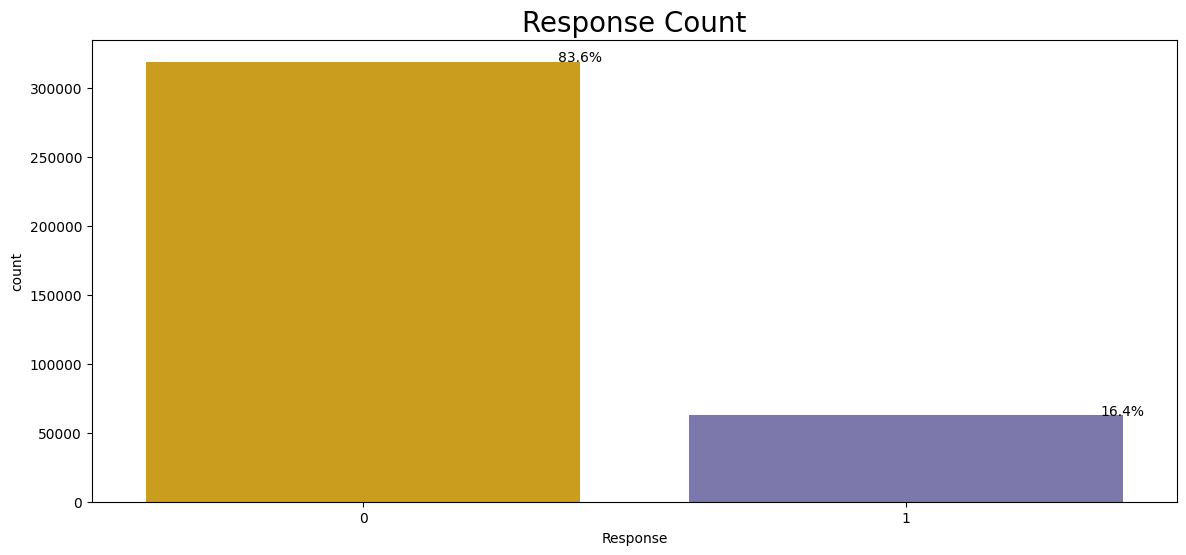

In [ ]:
plt.figure(figsize=(14,6))
total = float(len(df))
ax = sns.countplot(x='Response', data=df, palette='Dark2_r')


# Plot 1: Response Count
plt.title('Response Count', fontsize=20)
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage, (x, y),ha='center')
plt.show()

We can notice that the Data are not balanced, 83.6% percent peopel are not interest and 16.4% percent people are interest.

### Plotting a histogram of ages

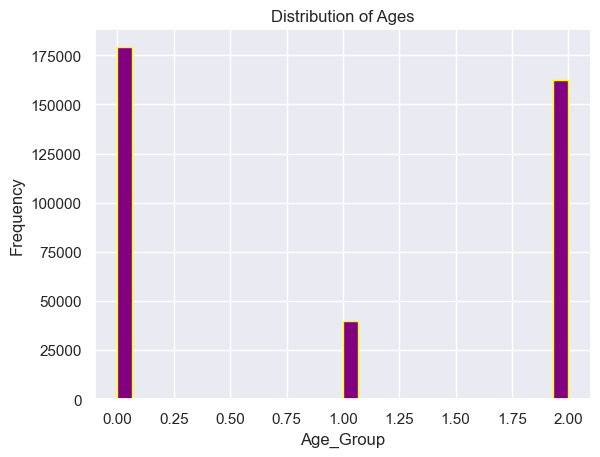

Age_Group
0    179202
2    162429
1     39800
Name: count, dtype: int64


In [ ]:
plt.hist(df['Age_Group'].dropna(), bins=30, color='purple', edgecolor='yellow',)
plt.title('Distribution of Ages')
plt.xlabel('Age_Group')
plt.ylabel('Frequency')
plt.show()
print(df['Age_Group'].value_counts())

The majority of our clientele falls within the young adult age and the middle age.

### Gender variable

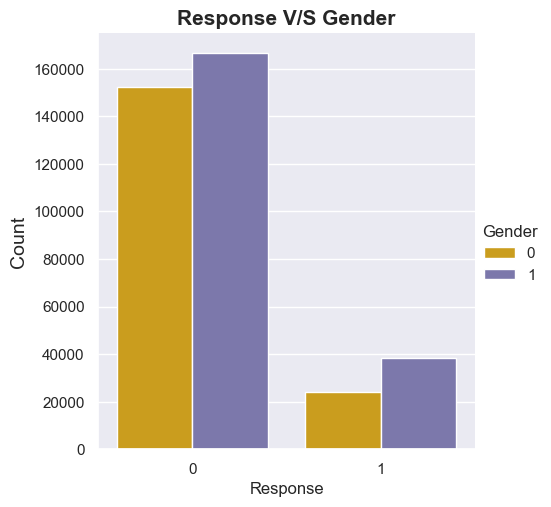

In [ ]:
show_gender_response_relation(df)

As the graph illustrates:

- The dataset's gender variable is distributed rather equally. The chance of buying insurance is also somewhat greater for the male category, which is marginally bigger than the female category.


- The response rate of those who are not interested in purchasing vehicle insurance is higher than that of those who are interested to buy vehicle insurance.

- Only 16.4% of individuals express interest in purchasing auto insurance, while 83.6% do not wish to do so.

### Previously Insured


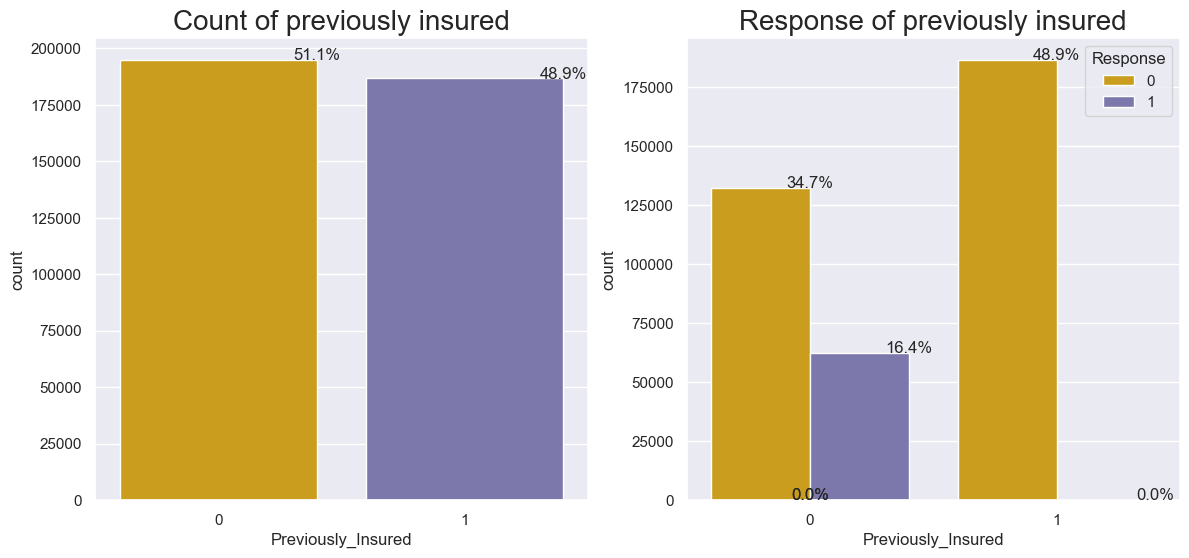

In [ ]:
plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
sns.set(style="darkgrid")
total = float(len(df))
ax1 = sns.countplot(x='Previously_Insured',palette='Dark2_r', data=df)
plt.title('Count of previously insured',fontsize=20)
for p in ax1.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax1.annotate(percentage, (x, y),ha='center')
plt.subplot(1,2,2)
total = float(len(df))
ax2 = sns.countplot(x='Previously_Insured',hue='Response',palette='Dark2_r', data=df)
plt.title('Response of previously insured',fontsize=20)
for p in ax2.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax2.annotate(percentage, (x, y),ha='center')
plt.show()


- 51,1% customer are previously insured are 48.9% customer are are not insured yet.
- Customer who are not perviosly insured are likely to be inetrested.

## Vehicle Age


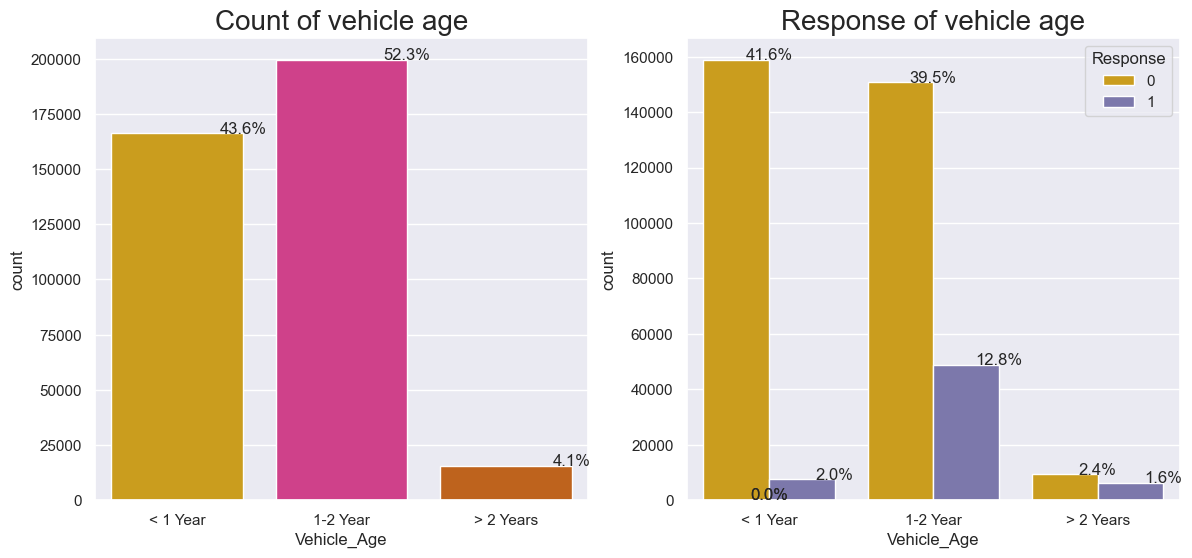

In [ ]:
plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
sns.set(style="darkgrid")
total = float(len(df))
ax1 = sns.countplot(x='Vehicle_Age',palette='Dark2_r', data=df)
plt.title('Count of vehicle age',fontsize=20)
for p in ax1.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax1.annotate(percentage, (x, y),ha='center')
plt.subplot(1,2,2)
total = float(len(df))
ax2 = sns.countplot(x='Vehicle_Age',hue='Response',palette='Dark2_r', data=df)
plt.title('Response of vehicle age',fontsize=20)
for p in ax2.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax2.annotate(percentage, (x, y),ha='center')
plt.show()

As we can see from the graph,

- Around 4.1% of vehicles are more than two years old, 52.6% are between one and two years old, and 43.2% are under one year old.
- 1.6% are interested in purchasing vehicle insurance for vehicles older than 2 years, 12.8% are interested in purchasing insurance for vehicles between 1 and 2 years old, and 2% are interested in purchasing insurance for vehicles younger than 1 year.

As vehicle age increases most of the people are aware of insurance and interested to buy the insurance for reducing the risk

## Region Code Distribution

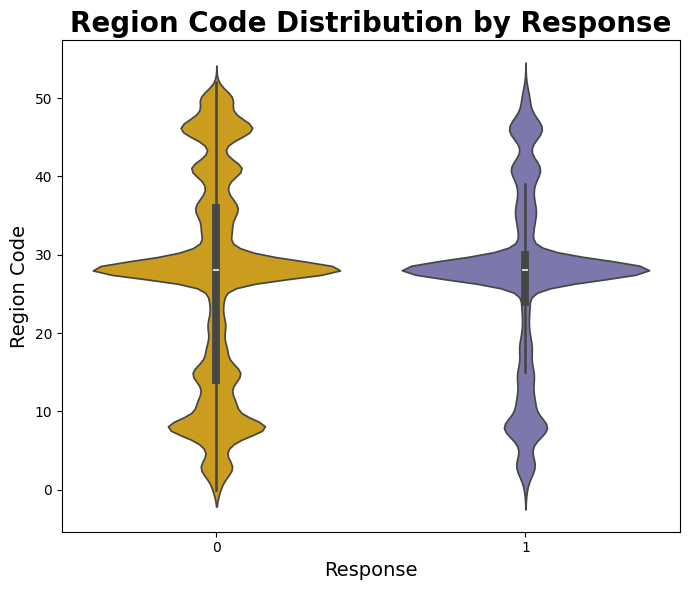

In [23]:
show_violin_distribution(df)

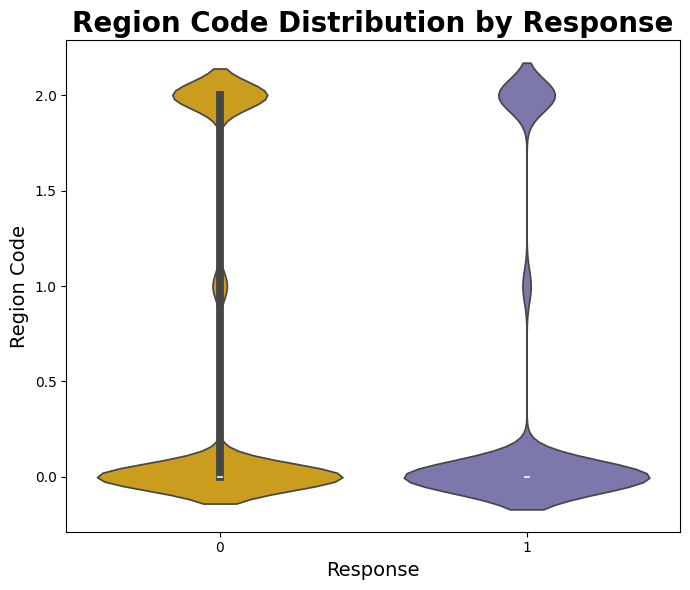

In [26]:
show_violin_distribution1(df)

As we can see, we have a huge dispersion of data in Region code , so in order to gain better insights on Region code, we can convert it into categories.Each each Region_Code as 'High', 'Medium', or 'Low' based on how frequently each code appears relative to others.

## Vehicle Damage

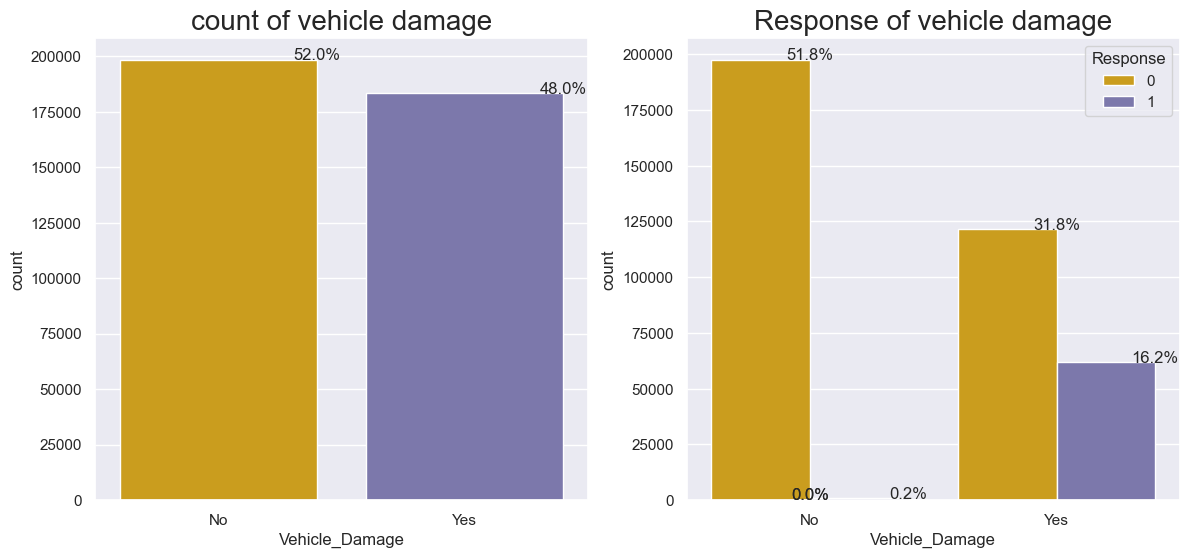

In [ ]:
plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
sns.set(style="darkgrid")
total = float(len(df))
ax1 = sns.countplot(x='Vehicle_Damage', palette='Dark2_r', data=df)
plt.title('count of vehicle damage',fontsize=20)
for p in ax1.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax1.annotate(percentage, (x, y),ha='center')
plt.subplot(1,2,2)
total = float(len(df))
ax2 = sns.countplot(x='Vehicle_Damage',hue='Response', palette='Dark2_r', data=df)
plt.title('Response of vehicle damage',fontsize=20)
for p in ax2.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax2.annotate(percentage, (x, y),ha='center')
plt.show()

As we can see from the graph,

48.0% of the vehicles have past damage
16.2% of people who have had a damaged vehicle in the past want to acquire vehicle insurance

## Exploring Annual Premium

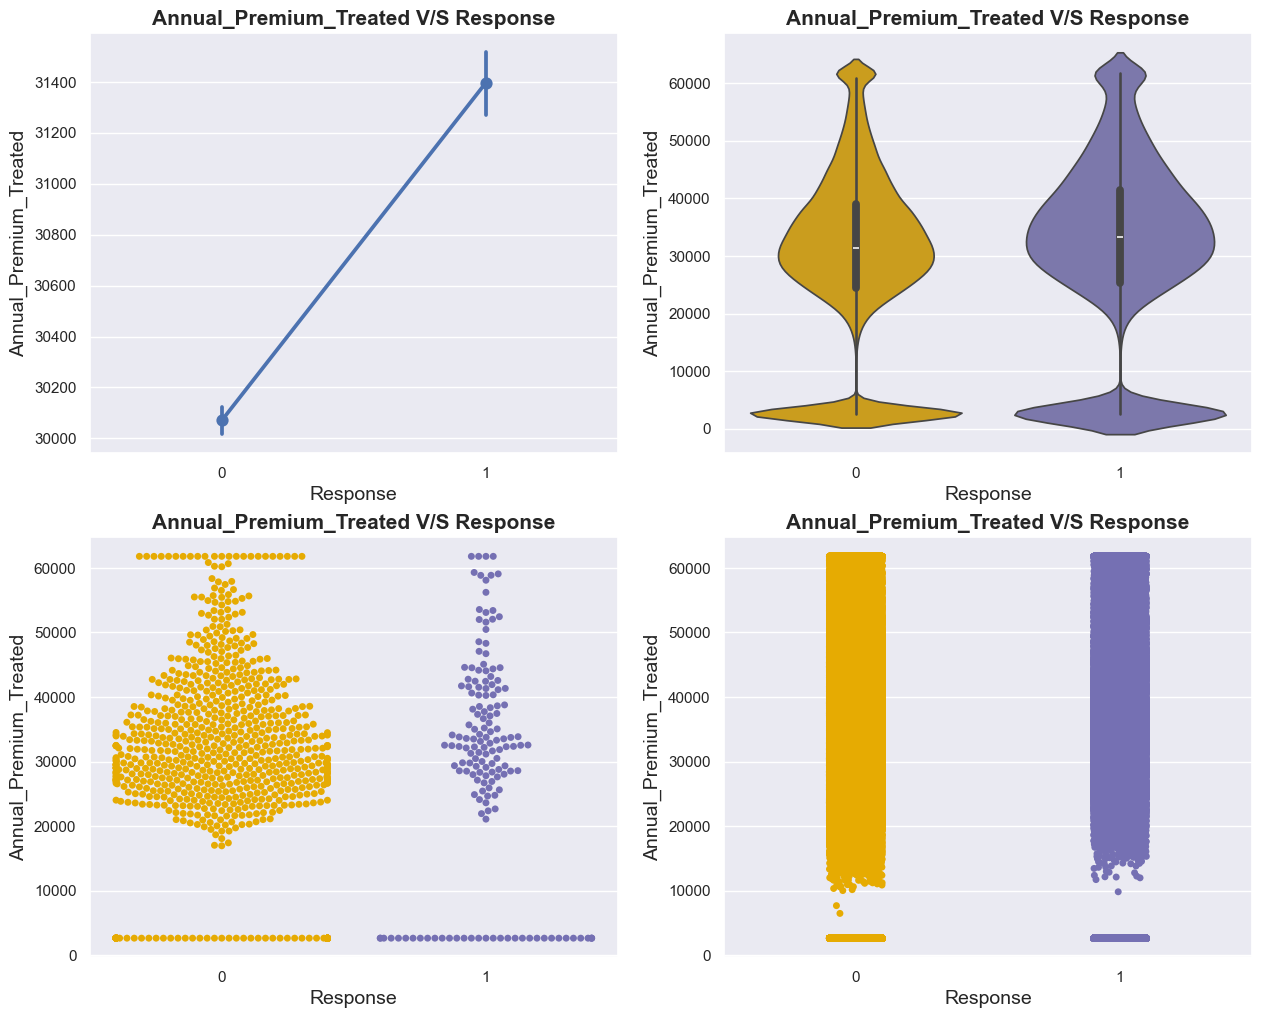

In [ ]:
show_annual_premium_relation(df)

- Customers paying higher annual premiums appear more likely to have taken the vehicle insurance, as indicated by the point and violin plots.
- The scatter plot shows a concentration of lower premiums associated with a negative response and a more sparse distribution at higher premium levels.

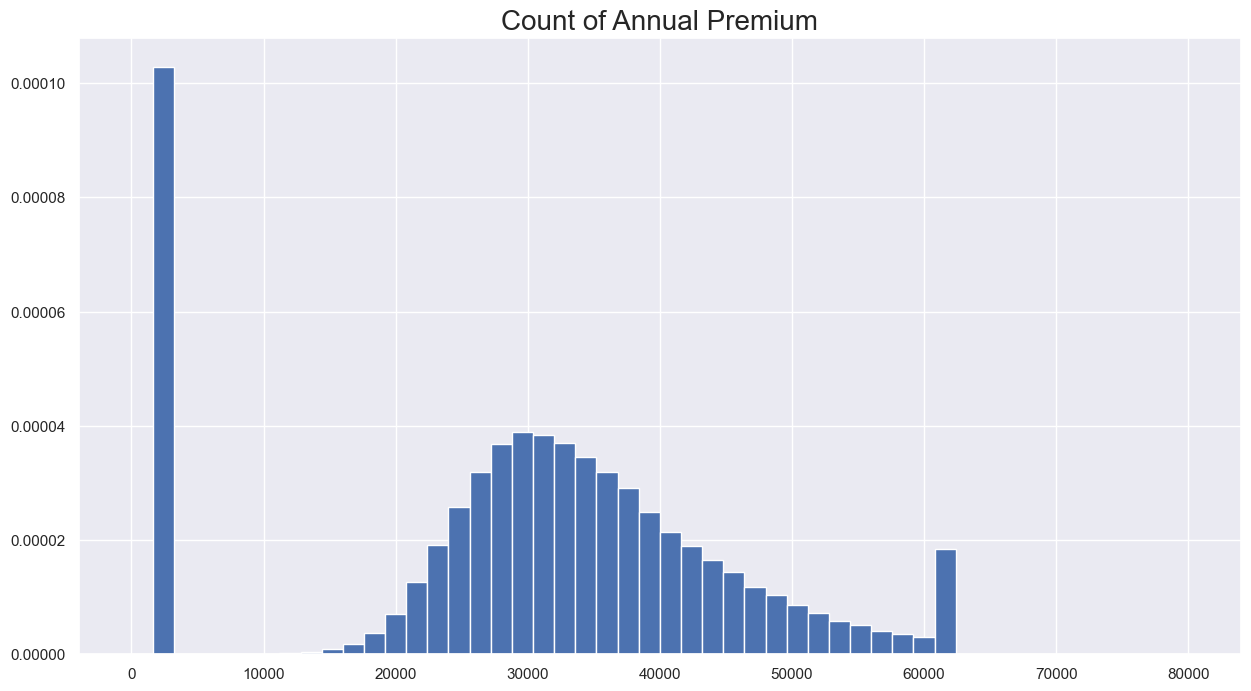

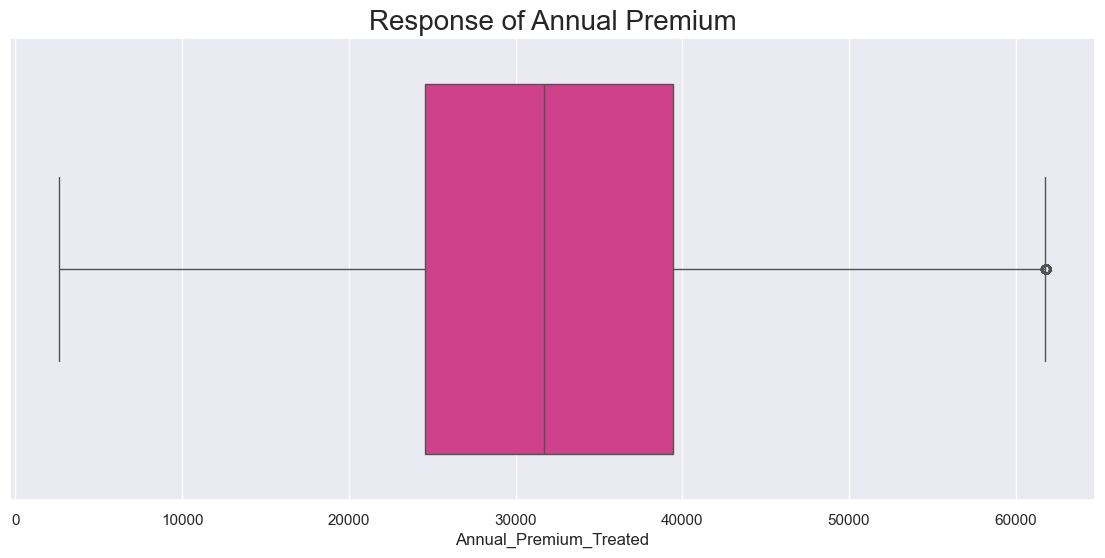

In [ ]:
plt.figure(figsize=(14,6))
sns.set(style="darkgrid")
df['Annual_Premium_Treated'].hist(figsize=(15,8), bins = 50, density = True, range=[0, 80000])
plt.title('Count of Annual Premium',fontsize=20)
plt.show()
plt.figure(figsize=(14,6))
sns.boxplot(x='Annual_Premium_Treated',palette="Dark2_r", data=df)
plt.title('Response of Annual Premium',fontsize=20)
plt.show()

### Vintage
Number of Days, Customer has been associated with the company

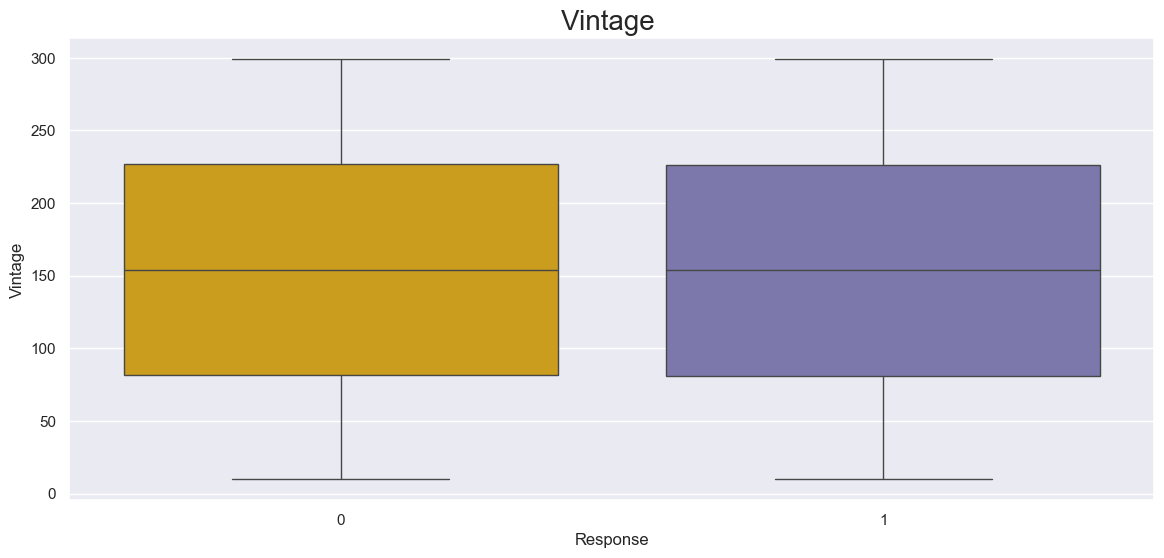

In [ ]:
plt.figure(figsize=(14,6))
sns.boxplot(x='Response',y='Vintage',palette='Dark2_r', data=df)
plt.title('Vintage ',fontsize=20)
plt.show()

We can also see that Vintage has an almost uniform distribution from above figure.


Descriptive Statistics for Annual_Premium_Treated:
Mean: 30288.012653009326
Median: 31686.0
Mode: 2630.0
Range: 59170.375
Variance: 235373898.19594067
Standard Deviation: 15341.900084277067


Descriptive Statistics for Vintage:
Mean: 154.1889463625138
Median: 154.0
Mode: 256
Range: 289
Variance: 7011.907439466359
Standard Deviation: 83.73713297854398




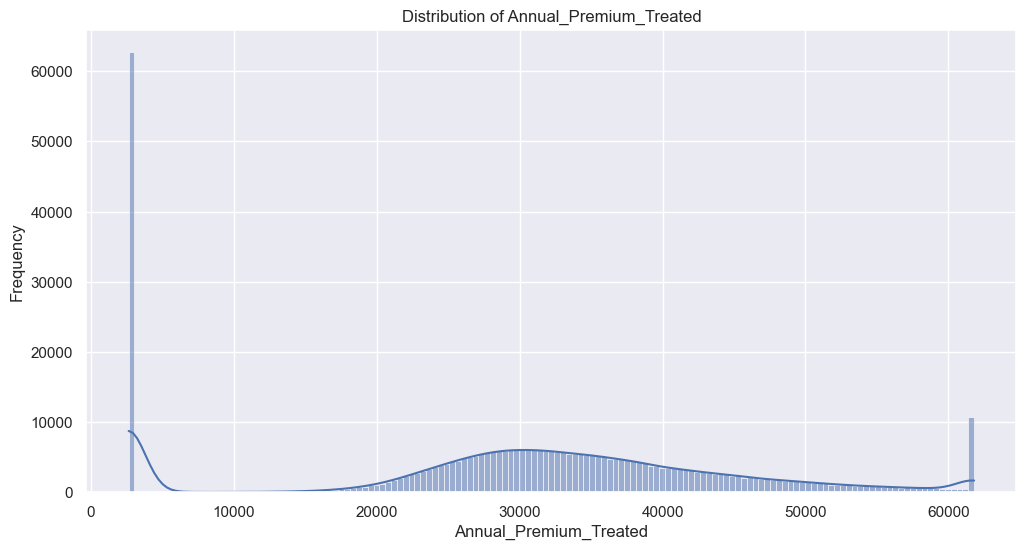

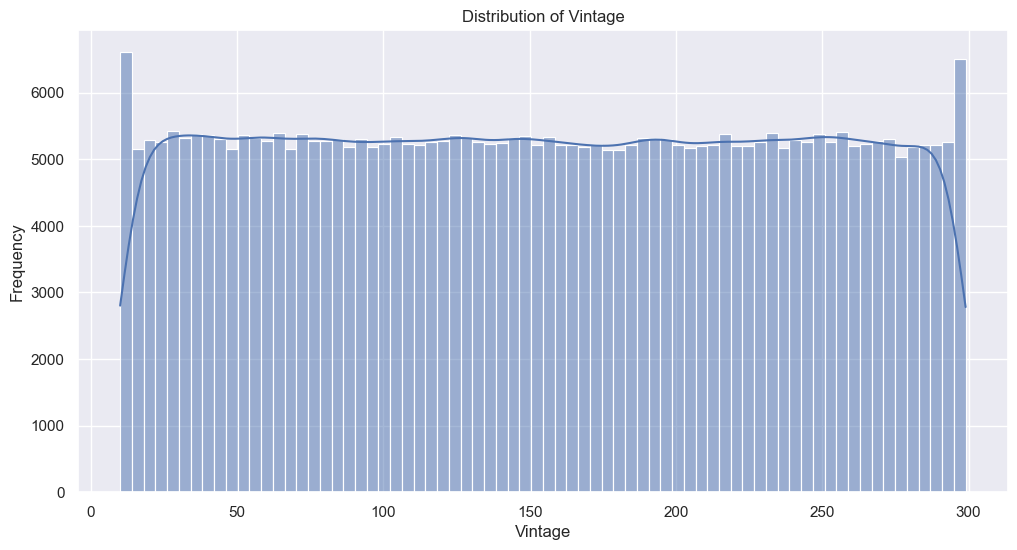

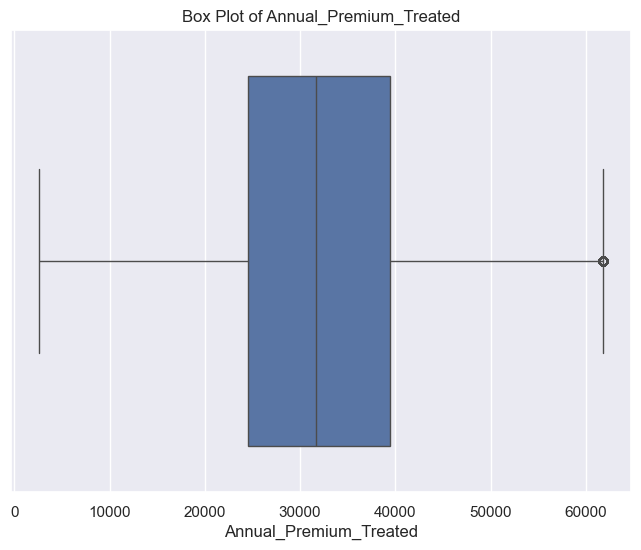

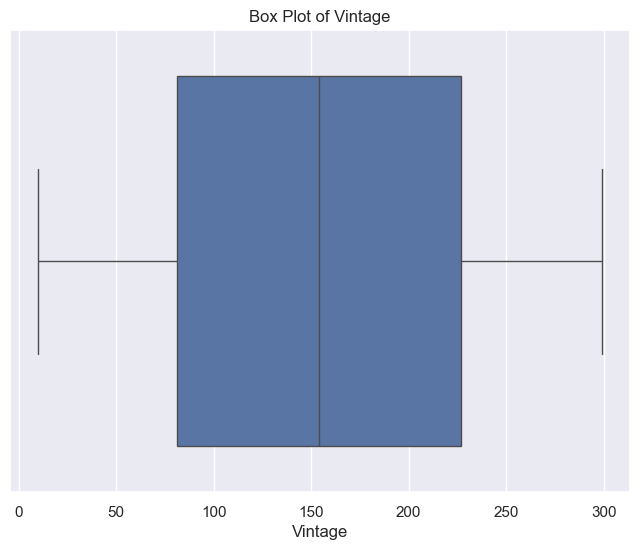

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df is your DataFrame and it contains 'Annual_Premium_Treated' and 'Vintage' columns

# Descriptive Statistics
def descriptive_statistics(df, feature):
    print(f"Descriptive Statistics for {feature}:")
    print("Mean:", df[feature].mean())
    print("Median:", df[feature].median())
    print("Mode:", df[feature].mode()[0])
    print("Range:", df[feature].max() - df[feature].min())
    print("Variance:", df[feature].var())
    print("Standard Deviation:", df[feature].std())
    print("\n")

descriptive_statistics(df, 'Annual_Premium_Treated')
descriptive_statistics(df, 'Vintage')

# Distribution Analysis with Histograms and Density Plots
def plot_distributions(df, feature):
    plt.figure(figsize=(12, 6))
    sns.histplot(df[feature], kde=True)
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.show()

plot_distributions(df, 'Annual_Premium_Treated')
plot_distributions(df, 'Vintage')

# Box-and-Whisker Plots
def plot_box(df, feature):
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=df[feature])
    plt.title(f'Box Plot of {feature}')
    plt.xlabel(feature)
    plt.show()

plot_box(df, 'Annual_Premium_Treated')
plot_box(df, 'Vintage')


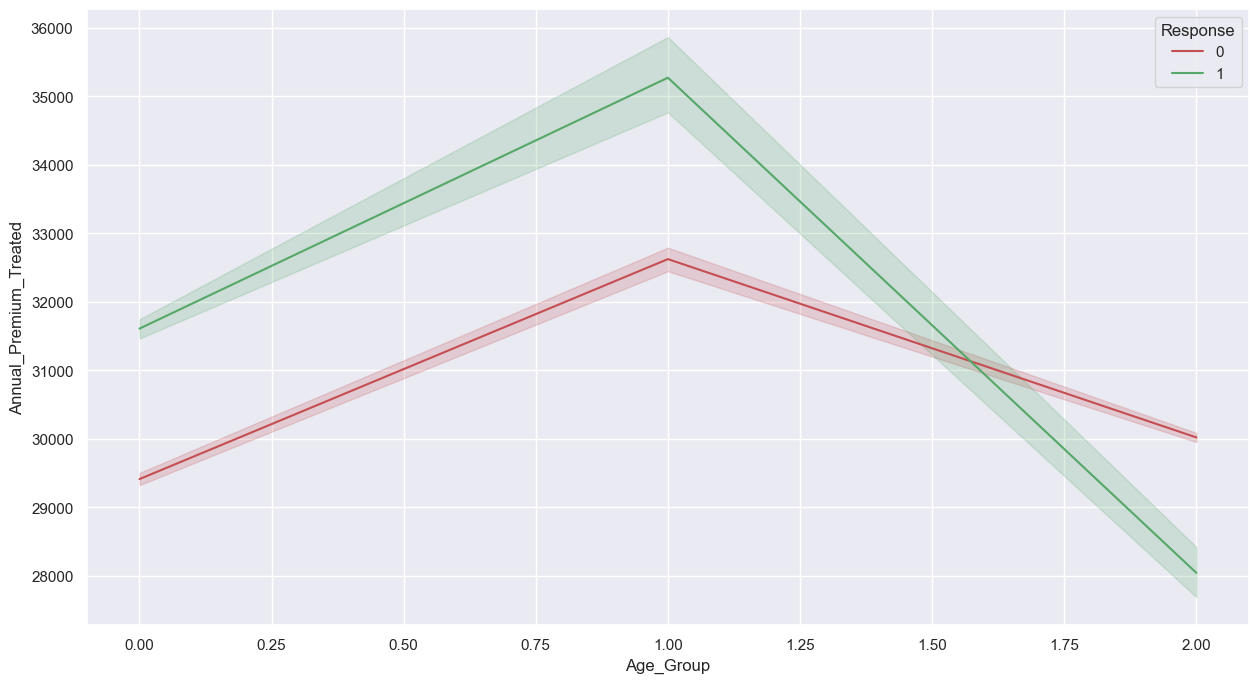

In [ ]:
plt.figure(figsize=(15,8))
sns.lineplot(data = df,x ='Age_Group', y='Annual_Premium_Treated', hue='Response', palette=['r', 'g', 'b'])
plt.show()
     

## Policy Sales Channel

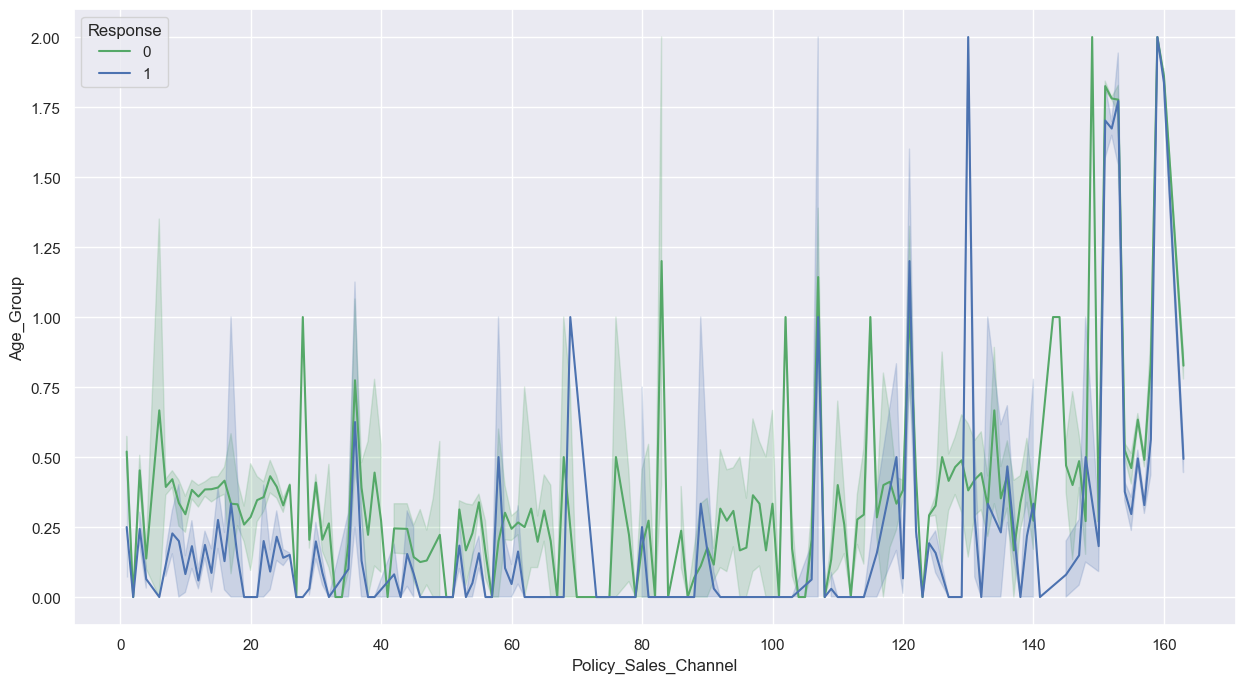

<Figure size 1400x600 with 0 Axes>

<Figure size 1400x600 with 0 Axes>

In [ ]:
plt.figure(figsize=(15,8))
sns.lineplot(data = df,y ='Age_Group', x='Policy_Sales_Channel', hue='Response', palette=['g', 'b'])
plt.show()
plt.figure(figsize=(14,6))

The line plot indicates variability in the responses to different policy sales channels across age groups, with certain channels showing a higher likelihood of response, particularly among the 'MiddleAge' group.

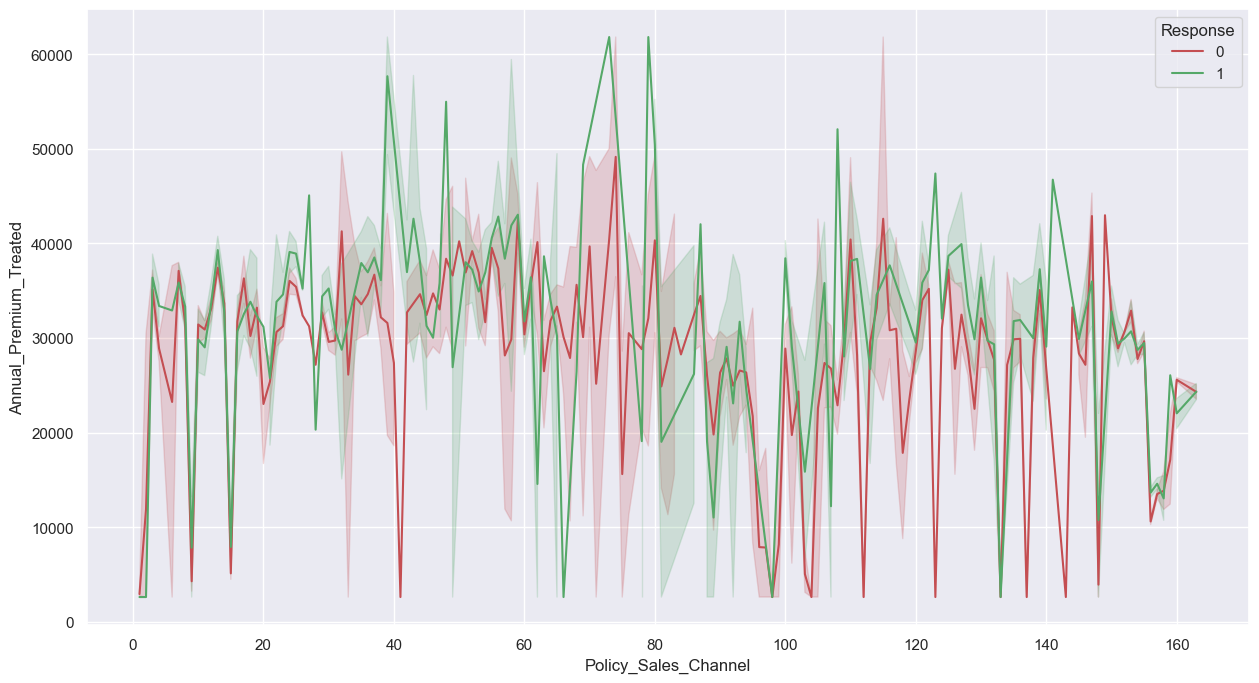

In [ ]:
plt.figure(figsize=(15,8))
sns.lineplot(data = df,x ='Policy_Sales_Channel', y='Annual_Premium_Treated', hue='Response', palette=['r', 'g'])
plt.show()

The line plot illustrates the relationship between 'Policy_Sales_Channel' and 'Annual_Premium_Treated', distinguished by 'Response'. The presence of two distinct lines suggests different trends or patterns in annual premium amounts for customers who did and did not respond positively (denoted by 1 and 0, respectively).The shaded areas show the range where most of the data points lie, indicating how much the premiums can vary for each sales channel.

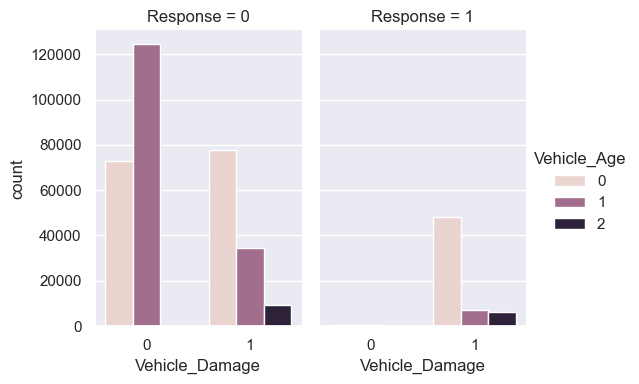

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

sns.catplot(x='Vehicle_Damage', hue='Vehicle_Age', col='Response', 
            data=df, kind='count', height=4, aspect=0.7)

plt.show()


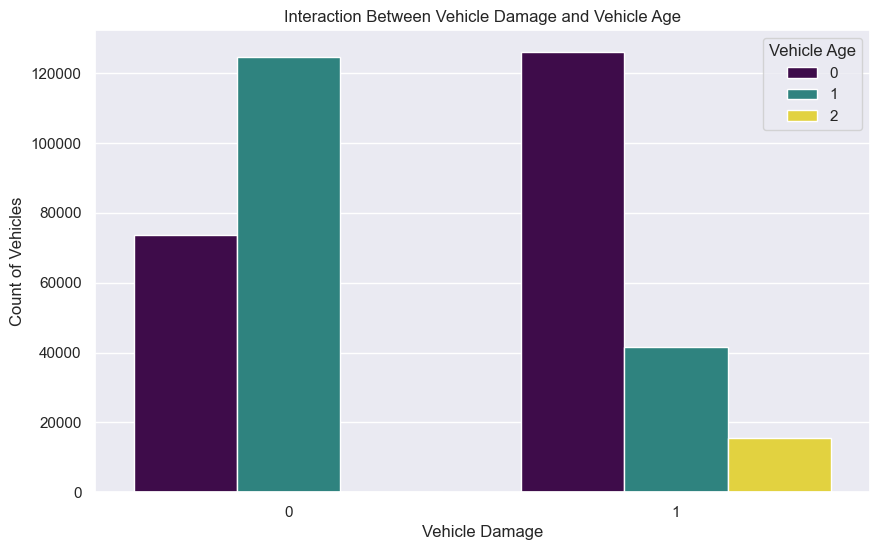

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Vehicle_Damage', hue='Vehicle_Age', data=df, palette='viridis')

plt.title('Interaction Between Vehicle Damage and Vehicle Age')
plt.xlabel('Vehicle Damage')
plt.ylabel('Count of Vehicles')  # Adjusted label for clarity
plt.legend(title='Vehicle Age')
plt.show()


- The bar chart indicates that vehicles with no damage are most commonly less than one year old, while those with damage span all age categories, with vehicles aged 1-2 years being the most prevalent among the damaged.

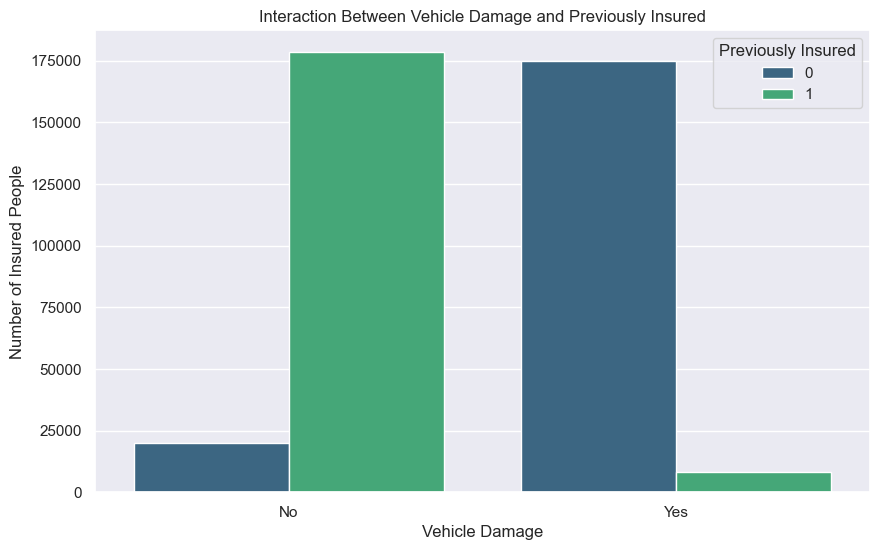

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Vehicle_Damage', hue='Previously_Insured', data=df, palette='viridis')

plt.title('Interaction Between Vehicle Damage and Previously Insured')
plt.xlabel('Vehicle Damage')
plt.ylabel('Number of Insured People')  # Adjusted label for clarity
plt.legend(title='Previously Insured')
plt.show()

- The graph shows that vehicles with no previous damage have a higher number of previously uninsured owners, whereas vehicles with damage are more likely to be owned by individuals who were previously insured.

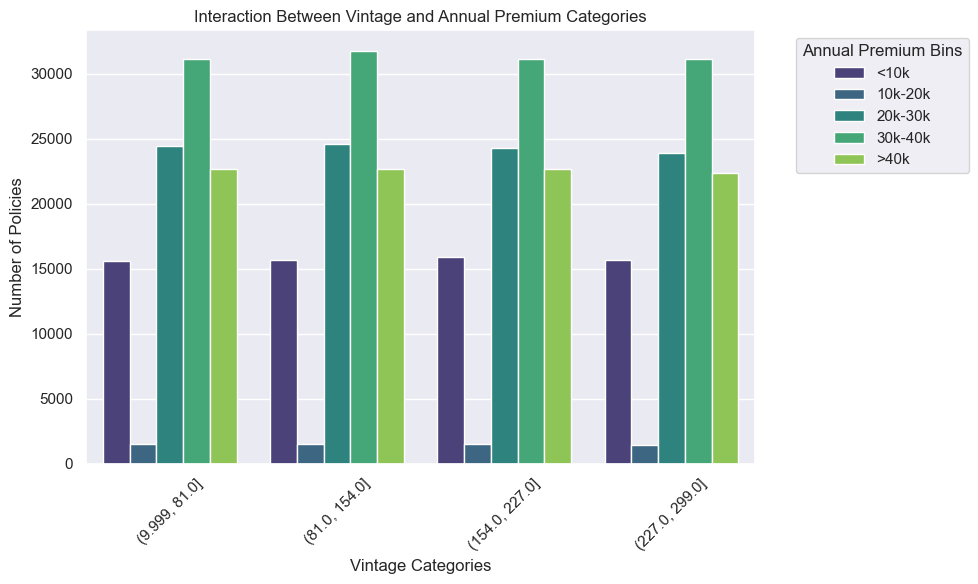

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Assuming 'Vintage' is a numerical column and 'Annual_Premium' is also numerical
# First, you need to bin 'Annual_Premium' if you haven't already

# Create bins for 'Annual_Premium'
bins = [0, 10000, 20000, 30000, 40000, np.inf]
labels = ['<10k', '10k-20k', '20k-30k', '30k-40k', '>40k']
df['Annual_Premium_Bins'] = pd.cut(df['Annual_Premium_Treated'], bins=bins, labels=labels)

# Now, create a countplot for 'Vintage' binned into intervals and 'Annual_Premium_Bins'
# You may want to adjust your binning strategy based on the distribution of your 'Vintage' data

# Create bins for 'Vintage' just as an example, adjust these based on your actual data
vintage_bins = pd.qcut(df['Vintage'], q=4, duplicates='drop')  # This will create quartile-based bins

plt.figure(figsize=(10, 6))
sns.countplot(x=vintage_bins, hue='Annual_Premium_Bins', data=df, palette='viridis')

plt.title('Interaction Between Vintage and Annual Premium Categories')
plt.xlabel('Vintage Categories')
plt.ylabel('Number of Policies')
plt.legend(title='Annual Premium Bins', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout
plt.show()

- The bar graph shows the number of policies distributed across different vintage categories, which are ranges of days since the policy inception. Each bar represents a range of annual premium amounts, illustrating the count of policies within each premium range. From the visual, it's apparent that policies with annual premiums in the 10-20k and 20-30k ranges are the most common across all vintage categories, with fewer policies having premiums less than 10k or greater than 40k.

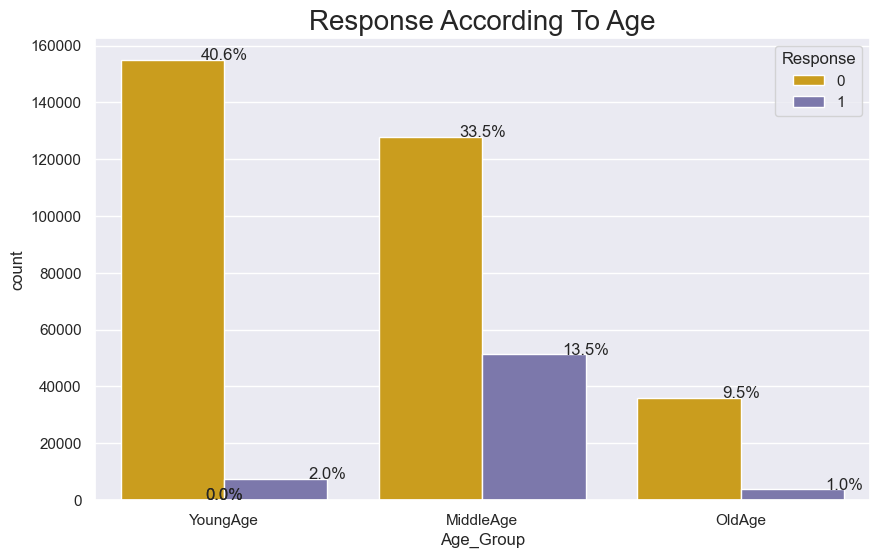

In [ ]:
plt.figure(figsize=(10,6))
sns.set(style="darkgrid")
total = float(len(df))
ax = sns.countplot(x='Age_Group',hue='Response',palette="Dark2_r", data=df)
plt.title('Response According To Age',fontsize=20)
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage, (x, y),ha='center')
plt.show()